# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import gmaps
from api_keys import g_key
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
lat_rand = np.random.uniform(low=-90.00, high=90.00,size=1500)
lng_rand = np.random.uniform(low=-180.00, high=180.00,size=1500)

lat_lng_zip = zip(lat_rand,lng_rand)
lat_lng_zip

cities_list = []
cities_lat_lng = []

for coord in lat_lng_zip:
    city = citipy.nearest_city(coord[0],coord[1]).city_name
    if city not in cities_list:
        cities_list.append(city)
        cities_lat_lng.append([coord[0],coord[1]])

print(len(cities_list))
print(len(cities_lat_lng))

627
627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
number = 1
url_1 = "http://api.openweathermap.org/geo/1.0/direct?"
url_2 = "https://api.openweathermap.org/data/2.5/weather?"
df_list = []

for city in cities_list:
    params_1 = {
        'q':city,
        'appid':weather_api_key,
        'limt':1
    }
    
    response_1 = requests.get(url_1, params_1)
    data_1 = response_1.json()
    
    if data_1 == []:
        print(f"{number},{city}: Data Missing")
    else:
        latitude = data_1[0]["lat"]
        longitude = data_1[0]["lon"]
    
        params_2 = {
        'lat':latitude,
        'lon':longitude,
        'units':'metric',
        'appid':weather_api_key
        }
    
        response_2 = requests.get(url_2, params_2)
        data_2 = response_2.json()

    
        if data_2["cod"] == '400':
            print(f"{number},{city}: Data Missing")
        else:
            print(f"{number},{city}: Data Found")
            cloudiness = data_2["clouds"]["all"]
            humidity = data_2["main"]["humidity"]
            max_temp = data_2["main"]["temp_max"]
            wind_speed = data_2["wind"]["speed"]
            df_list.append([city, latitude, longitude, cloudiness, humidity, max_temp, wind_speed])
    number += 1
    
    if number > 550:
        break


1,barrow: Data Found
2,parabel: Data Found
3,atuona: Data Found
4,victoria: Data Found
5,lorengau: Data Found
6,kununurra: Data Found
7,saint-philippe: Data Found
8,hobart: Data Found
9,kapaa: Data Found
10,thompson: Data Found
11,one hundred mile house: Data Found
12,rikitea: Data Found
13,mahebourg: Data Found
14,codrington: Data Found
15,rawannawi: Data Found
16,attawapiskat: Data Found
17,vavoua: Data Found
18,teguldet: Data Found
19,varnamo: Data Found
20,mogadishu: Data Found
21,alofi: Data Found
22,portland: Data Found
23,elko: Data Found
24,bluff: Data Found
25,gohpur: Data Found
26,albany: Data Found
27,nanortalik: Data Found
28,san patricio: Data Found
29,carnarvon: Data Found
30,la ronge: Data Found
31,vaini: Data Found
32,puerto ayora: Data Found
33,bredasdorp: Data Found
34,klaksvik: Data Found
35,general roca: Data Found
36,faanui: Data Found
37,zonguldak: Data Found
38,yar-sale: Data Missing
39,campos novos: Data Found
40,likasi: Data Found
41,moscow: Data Found
42,deqin

329,grand river south east: Data Found
330,longyearbyen: Data Found
331,tinosu: Data Found
332,santo anastacio: Data Found
333,arlit: Data Found
334,palabuhanratu: Data Found
335,agsu: Data Found
336,alness: Data Found
337,taburi: Data Found
338,azle: Data Found
339,macaboboni: Data Missing
340,chicama: Data Found
341,sovetskiy: Data Found
342,talnakh: Data Found
343,mier: Data Found
344,akhtanizovskaya: Data Found
345,quartucciu: Data Found
346,issaquah: Data Found
347,jogindarnagar: Data Missing
348,teahupoo: Data Found
349,karauzyak: Data Missing
350,ulladulla: Data Found
351,clyde river: Data Found
352,santa rosa: Data Found
353,riohacha: Data Found
354,jinan: Data Found
355,jiamusi: Data Found
356,lompoc: Data Found
357,sarny: Data Found
358,beringovskiy: Data Missing
359,touros: Data Found
360,bristol: Data Found
361,abdulino: Data Found
362,staroye drozhzhanoye: Data Found
363,balkhash: Data Found
364,edd: Data Found
365,mikuni: Data Found
366,susanville: Data Found
367,aykhal: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame(df_list,columns=["City","Latitude","Longitude","Cloudiness","Humidity","Max Temperature","Wind Speed"])
city_data

,City,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,barrow,71.290556,-156.788611,75,86,1.01,4.12
1,parabel,58.713741,81.501793,76,70,17.95,6.85
2,atuona,-9.779323,-139.061949,29,71,20.19,10.55
3,victoria,48.428318,-123.364953,100,85,11.58,6.17
4,lorengau,-2.032957,147.278919,83,75,27.77,3.68
...,...,...,...,...,...,...,...
525,malakal,9.538849,31.658417,100,37,32.88,2.34
526,chardara,39.684987,66.887018,75,15,34.89,2.06
527,berdigestyakh,62.098289,126.699837,41,62,17.05,1.53
528,haibowan,39.689752,106.820411,35,7,34.69,4.67


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
cities_humid = city_data.loc[city_data["Humidity"] > 100]
cities_humid

,City,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed


In [6]:
#  Get the indices of cities that have humidity over 100%.

# humid_index= cities_humid.index
# humid_index[0]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_city_data = cities.drop(humid_index[0], inplace=False)
clean_city_data = city_data
clean_city_data

,City,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,barrow,71.290556,-156.788611,75,86,1.01,4.12
1,parabel,58.713741,81.501793,76,70,17.95,6.85
2,atuona,-9.779323,-139.061949,29,71,20.19,10.55
3,victoria,48.428318,-123.364953,100,85,11.58,6.17
4,lorengau,-2.032957,147.278919,83,75,27.77,3.68
...,...,...,...,...,...,...,...
525,malakal,9.538849,31.658417,100,37,32.88,2.34
526,chardara,39.684987,66.887018,75,15,34.89,2.06
527,berdigestyakh,62.098289,126.699837,41,62,17.05,1.53
528,haibowan,39.689752,106.820411,35,7,34.69,4.67


In [18]:
clean_city_data.to_csv("clean_city_data", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# This scatter plot was created using Latitude for the x axis, and the Max Temperature for y. 
# We can see, as the latitude approaches 0, the temperature gets higher, however,
# the true peak for temperatures is more around 20-30 degrees latitude, than 0.

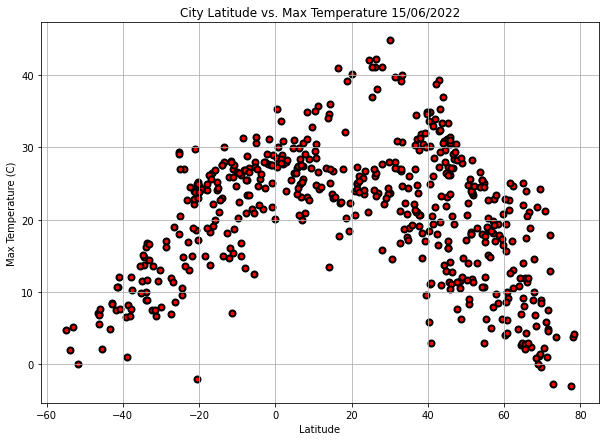

In [64]:
x_axis = clean_city_data["Latitude"]
max_temp = clean_city_data["Max Temperature"]
plt.figure(figsize=(10,7))
plt.scatter(x_axis,max_temp, facecolor="red", edgecolor="black", linewidth=2)
plt.grid()
plt.title("City Latitude vs. Max Temperature 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.savefig("../plots/lat_vs_temp.png")


## Latitude vs. Humidity Plot

In [ ]:
# In this scatter plot, we don't see much of a correlation between latitude and humidity.
# More countries surveyed overall have high humidity, and very few having low humidity.

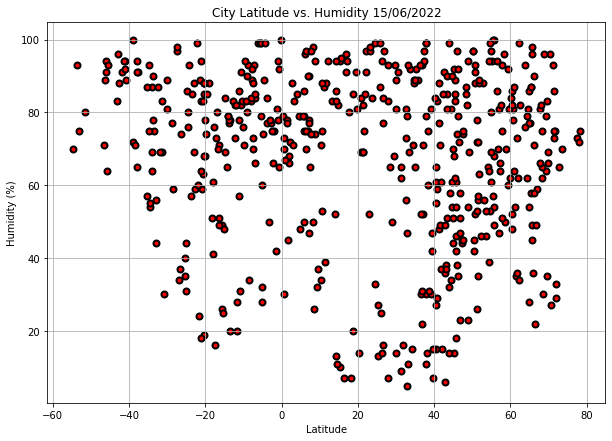

In [65]:
humidity = clean_city_data["Humidity"]
plt.figure(figsize=(10,7))
plt.scatter(x_axis,humidity, facecolor="red", edgecolor="black", linewidths=2)
plt.grid()
plt.title("City Latitude vs. Humidity 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../plots/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

In [ ]:
# Once again, we do not see any strict correlation between latitude and cloudiness.
# We also see a much more even distribution of cloudiness %, than the previous plot, 
# telling us that cloudiness, humidity and temperature do not have a necesary correlation either.

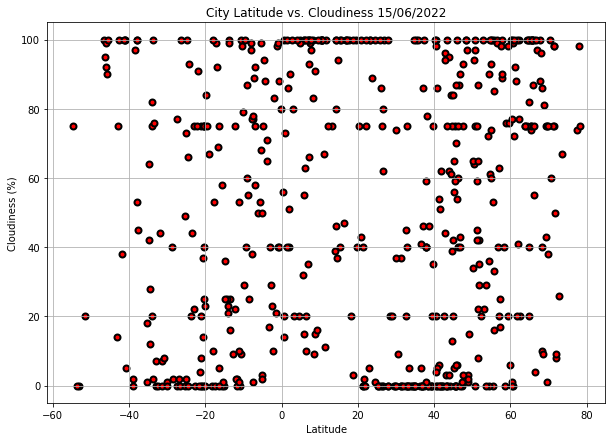

In [66]:
cloudiness = clean_city_data["Cloudiness"]
plt.figure(figsize=(10,7))
plt.scatter(x_axis,cloudiness, facecolor="red", edgecolor="black", linewidths=2)
plt.grid()
plt.title("City Latitude vs. Cloudiness 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../plots/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
# Here we see another scatter plot that has no obvious correlation with the others.
# Most countries surveyed have wind speeds under 8 metres per second. However, we can see outliers both above and below 0 degrees latitude

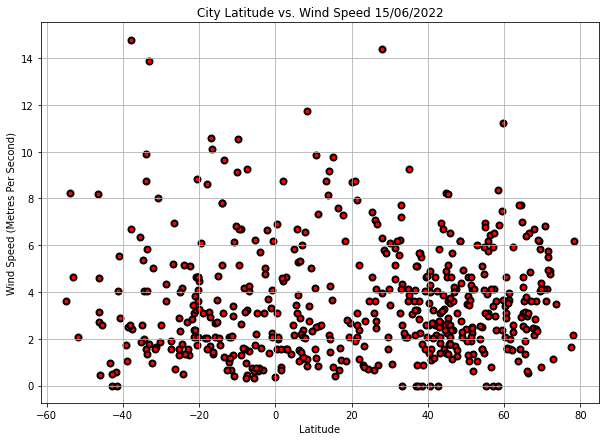

In [67]:
wind_speed = clean_city_data["Wind Speed"]
plt.figure(figsize=(10,7))
plt.scatter(x_axis,wind_speed, facecolor="red", edgecolor="black", linewidths=2)
plt.grid()
plt.title("City Latitude vs. Wind Speed 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Metres Per Second)")
plt.savefig("../plots/lat_vs_wind.png")

## Linear Regression

In [25]:
import scipy.stats as st

x_axis_nh = clean_city_data["Latitude"].loc[clean_city_data["Latitude"]>=0]
x_axis_sh = clean_city_data["Latitude"].loc[clean_city_data["Latitude"]<0]
max_temp_nh = clean_city_data["Max Temperature"].loc[clean_city_data["Latitude"]>=0]
max_temp_sh = clean_city_data["Max Temperature"].loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value = -0.61


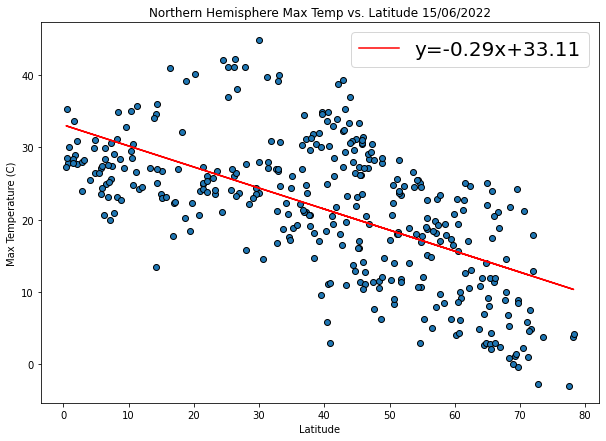

In [68]:
slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_nh, max_temp_nh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_nh,max_temp_nh, edgecolor="black")
plt.plot(x_axis_nh,(slope*x_axis_nh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Northern Hemisphere Max Temp vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/nh_lat_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value = 0.78


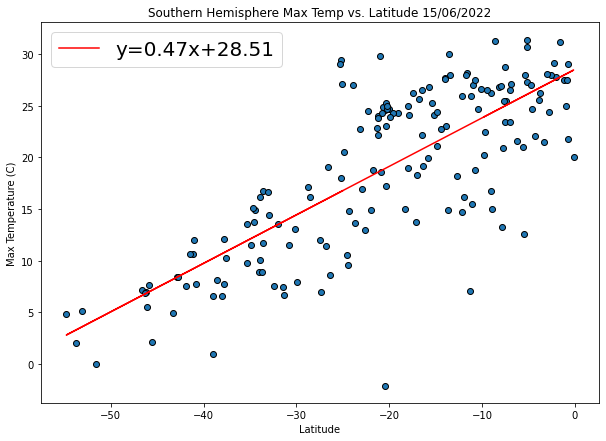

In [69]:
slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_sh, max_temp_sh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_sh,max_temp_sh, edgecolor="black")
plt.plot(x_axis_sh,(slope*x_axis_sh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Southern Hemisphere Max Temp vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/sh_lat_vs_temp.png")

In [ ]:
# As we assessed before, temperature and latitude do appear to have a necessary correlation.
# As proof of this: the Northern Hemisphere we have a moderately strong R Value of -0.6, and a strong R Value of 0.7 for the Southern Hemisphere.
# The R Value of each would be improved with the removal of outliers.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value = -0.02


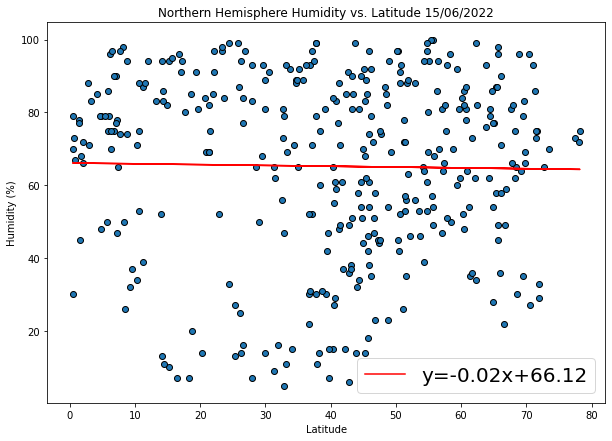

In [70]:
humidity_nh = clean_city_data["Humidity"].loc[clean_city_data["Latitude"]>=0]
humidity_sh = clean_city_data["Humidity"].loc[clean_city_data["Latitude"]<0]

slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_nh, humidity_nh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_nh,humidity_nh, edgecolor="black")
plt.plot(x_axis_nh,(slope*x_axis_nh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Northern Hemisphere Humidity vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/nh_lat_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value = -0.1


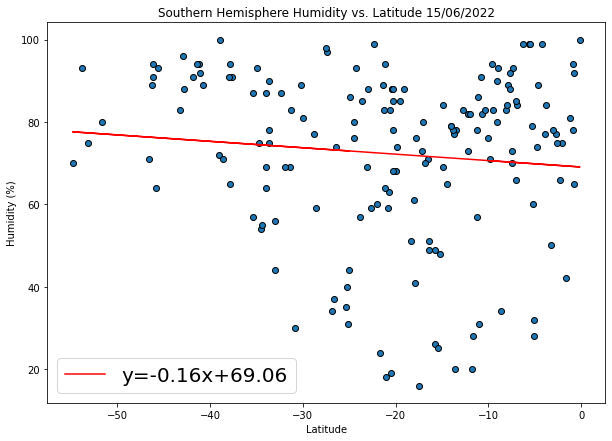

In [71]:
slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_sh, humidity_sh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_sh,humidity_sh, edgecolor="black")
plt.plot(x_axis_sh,(slope*x_axis_sh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Southern Hemisphere Humidity vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/sh_lat_vs_humidity.png")

In [ ]:
# The R Values of both of these charts are under 0.3 which tells us of a very weak correlation of these two variable.
# We can conclude humidity has no necessary relationship to latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value = 0.0


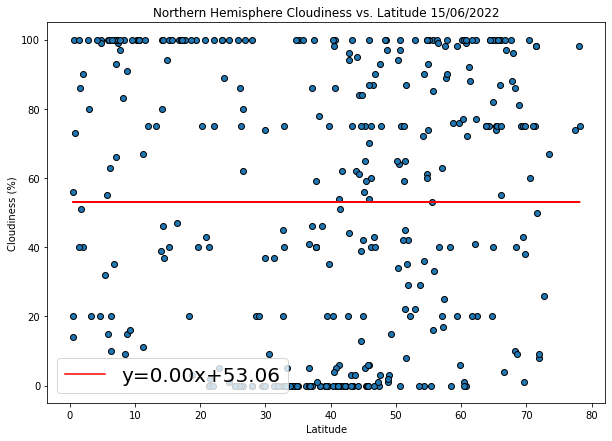

In [72]:
cloudiness_nh = clean_city_data["Cloudiness"].loc[clean_city_data["Latitude"]>=0]
cloudiness_sh = clean_city_data["Cloudiness"].loc[clean_city_data["Latitude"]<0]

slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_nh, cloudiness_nh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_nh,cloudiness_nh, edgecolor="black")
plt.plot(x_axis_nh,(slope*x_axis_nh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Northern Hemisphere Cloudiness vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/nh_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value = 0.024671040650509835


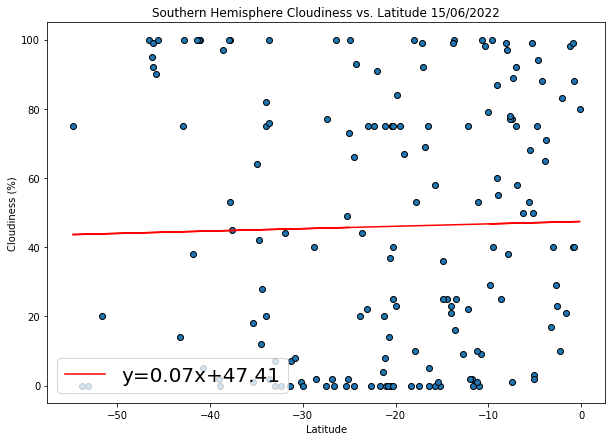

In [73]:
slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_sh, cloudiness_sh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_sh,cloudiness_sh, edgecolor="black")
plt.plot(x_axis_sh,(slope*x_axis_sh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Southern Hemisphere Cloudiness vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value = {r_value}")
plt.savefig("../plots/sh_lat_vs_cloudiness.png")

In [ ]:
# Here we have an even less of a correlation between the two variables
# We can conclude no necessary relationship between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value = 0.010740360501896336


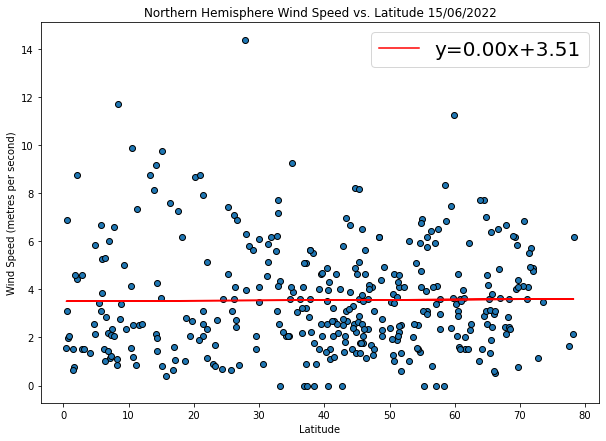

In [74]:
wind_speed_nh = clean_city_data["Wind Speed"].loc[clean_city_data["Latitude"]>=0]
wind_speed_sh = clean_city_data["Wind Speed"].loc[clean_city_data["Latitude"]<0]

slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_nh, wind_speed_nh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_nh,wind_speed_nh, edgecolor="black")
plt.plot(x_axis_nh,(slope*x_axis_nh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Northern Hemisphere Wind Speed vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (metres per second)")
print(f"The r value = {r_value}")
plt.savefig("../plots/nh_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value = -0.07


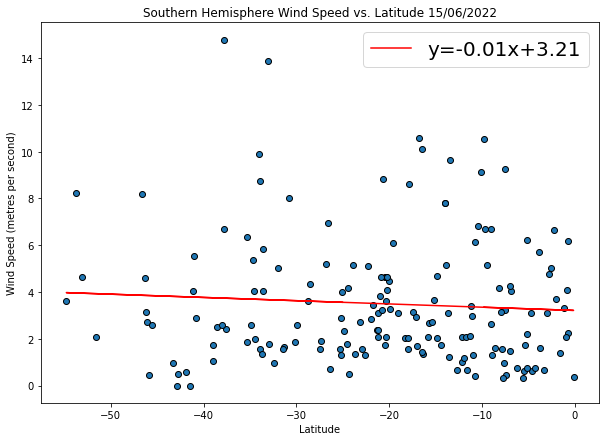

In [75]:
slope, intercept, r_value, p_value, std_err  = st.linregress(x_axis_sh, wind_speed_sh)
plt.figure(figsize=(10,7))
plt.scatter(x_axis_sh,wind_speed_sh, edgecolor="black")
plt.plot(x_axis_sh,(slope*x_axis_sh)+intercept, color="red", label="y={:.2f}x+{:.2f}".format(slope,intercept))
plt.legend(fontsize=20)
plt.title("Southern Hemisphere Wind Speed vs. Latitude 15/06/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (metres per second)")
print(f"The r value = {round(r_value,2)}")
plt.savefig("../plots/sh_lat_vs_wind.png")

In [ ]:
# Once again, there is no correlation between these two variables
# We can see more obvious outliers in these scatter plots. The removal of these may strengthen the correlation,
# but as the correlation is almost non-existant to begin with, we would still rpoduce a very weak R Value